## Introduction

In this notebook, we will explore a machine learning classifier – the Naive Bayes classifier, which uses the Bayes’ theorem to classify test examples into one of the defined classes.

## Bayes' Theorem

In Statistics and probability theory, Bayes’ theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is a simple mathematical formula used for calculating conditional probabilities.

Conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

        P(A|B) = (P(B|A).P(A))/P(B)

where  P(A|B) is the probability of A occuring given B has already occured, P(B|A) is the probability of B occuring given A has already occured, P(A) is the probability of A occuring and P(B) is the probability of B occuring.

## Bayes' Theorem Example

Let’s suppose we have a Deck of Cards, we wish to find out the “Probability of the Card we picked at random to be a King given that it is a Face Card“. So, according to Bayes Theorem, we can solve this problem. First, we need to find out the probability

     1. P(King) which is 4/52 as there are 4 Kings in a Deck of Cards.
     2. P(Face|King) is equal to 1 as all the Kings are face Cards.
     3. P(Face) is equal to 12/52 as there are 3 Face Cards in a Suit of 13 cards and there are 4 Suits in total.
     
   Now, putting all the values in the Bayes’ Equation 
   
          P(King|Face) = (P(Face|King).P(King)) / P(Face)
                       = (1.(1/13))/(3/13)
                       = 1/3


## Naive Bayes Classifier

Naive Bayes classifiers are a family of probabilistic classifiers that are based on Bayes’ theorem. It is used to solve many different problem statements, and it is quite fast in training a model since Naive Bayes classifier completely works on probability, so the conversion happens quickly. These algorithms work by combining the probabilities that an instance belongs to a class based on the value of a set of features.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive.

The fundamental Naïve Bayes assumption is that each feature makes an independent and equal contribution to the outcome.


## Types of Naive Bayes Classifier

1. Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

2. Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

3. Gaussian Naive Bayes:
In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Normal distribution). 

## How does Naive Bayes classifier work?

Naive Bayes methods work by applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

The Bayes’ theorem states that for a given class variable y and dependent feature vector $ x = x_{1} + x_{2} ... x_{n}.$

The conditional probability of the class label $y$, given the observation $x$ is:

  ![Conditional_prob.png](attachment:Conditional_prob.png)
     
We can simplify the above expression using the naive assumption that features of measurement are independent of each other, i.e.

![Second_equation.png](attachment:Second_equation.png)

which lead to:


![Third_equation.png](attachment:Third_equation.png)

Since, $ P(x_{1},..,x_{n}) $ is constant given the input, we use Maximum A Posteriori (MAP) estimation to estimate P(y) and $ P(x_{i} ∣ y) $, which results in:

![MAP_equation.png](attachment:MAP_equation.png)

This calculation can be performed for each of the class labels, and the label with the largest probability can be selected as the classification for the given instance.

## Step By Step Implementation of Naive Bayes

    1. Handle Data
    2. Summarize Data
    3. Make Predictions
    4. Evaluate 


## Dataset

This Iris dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica

## Step 1: Handle Data

The first thing we need to do is load our data file. The data is in CSV format. We can open the file with the read_csv function.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
from collections import Counter
import math
from scipy.stats import norm

In [ ]:
iris = pd.read_csv('C:\\Users\\NITRKL\\Downloads\\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Summarize the Data


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
target_category = iris["Species"].unique()
target_category=list(map(str,target_category))
print(target_category)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


**Data Visualization**

<AxesSubplot:xlabel='Species'>

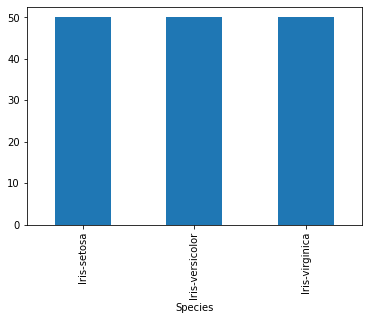

In [ ]:
iris.groupby("Species").Species.count().plot.bar(ylim=0)

In [ ]:
species = iris.Species
data = iris.drop(columns=['Species','Id']) 

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris['Category'] = iris['Species'].factorize()[0]
category = iris['Category']
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Category
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


**Split dataset into train/test**



In [ ]:
#split dataset into test set(20%) and train set(80%) using stratify to split into equal size
from sklearn.model_selection import train_test_split

data_train,data_test,species_train,species_test = train_test_split(data,category, test_size = 0.2, stratify = category,random_state=1)
print(np.bincount(species_train))

[40 40 40]


In [ ]:
newIris = pd.DataFrame(np.column_stack([data_train,species_train]))

In [ ]:
#Sort and rearrange the data based on the species

setosa = newIris[newIris[4] == 0]
versicolor = newIris[newIris[4]==1]       
virginica  = newIris[newIris[4]==2] 
newIris = pd.concat([setosa,versicolor,virginica])

In [ ]:
#Splits data based on species

setosa_data=newIris[0:40] 
versicolor_data=newIris[40:80]
virginica_data=newIris[80:120]

**Find mean**

In [ ]:

setosa_mean = setosa_data.mean()
versicolor_mean = versicolor_data.mean()
virginica_mean= virginica_data.mean()

**Find standard deviation**

In [ ]:

setosa_std = setosa_data.std()
versicolor_std = versicolor_data.std()
virginica_std = virginica_data.std()

## Step 3: Make Predictions

We are now ready to make predictions using the summaries prepared from our training data. Making predictions involves calculating the probability that a given data instance belongs to each class, then selecting the class with the largest probability as the prediction. We need to perform the following tasks:


**Finding Likelihood**

In [ ]:

x =[]
likelihood = []
   
for j in range(len(newIris)):
    distribution = 1
    if(j<40):
        mean=setosa_mean
        std = setosa_std
    if(j>=40 and j<80):
        mean=versicolor_mean
        std = versicolor_std
    if(j>=80 and j<120):
        mean=virginica_mean
        std = virginica_std    
    
    for i in range(4):
        x = newIris.iloc[j] 
        a= ((x[i]- mean[i])**2)/(2*std[i]**2)
        b= math.sqrt(2*math.pi*(std[i]**2))
        y = math.exp(-a)/b
        distribution= distribution*y  
    likelihood.append(distribution)
    x=[]  
print(likelihood)        

[1.4426580700892142, 4.859950538247494, 3.681311494548152, 0.5602613645293171, 11.096692414208938, 4.708645550519092, 0.9869177278847482, 5.027865366544021, 10.634222125259459, 0.3347440525802828, 2.5067408810201983, 5.523920120747676, 0.08046997818740641, 4.429608698883286, 9.194055698490734, 0.06525343204281543, 0.24506445794291157, 2.3282164040871396, 0.04070926293372312, 6.491269205996306, 0.3020811479117195, 4.4807889760388715, 4.103501562127629, 9.074380401691084, 5.040647664716327, 10.402481819111953, 4.846470606571818, 1.0944825796912079, 0.0502681254327594, 5.461187819110376, 4.913679372606572, 9.366533208389093, 8.510389058937557, 0.4502965389209152, 2.7530617779191386, 4.151748278169196, 0.021453261081038864, 1.6118835377478418, 4.074492875633123, 1.5853896384286335, 0.8403628783339735, 0.3959314997528379, 0.0948400685663931, 0.4082805469513769, 0.046744805289939496, 0.5249417793314618, 0.13294660495590657, 0.17103373105970487, 1.4176966480545758, 1.5221936082025496, 0.05579

**Find Priori probability**

In [ ]:

setosa_priori = len(setosa_data)/len(newIris)
versicolor_priori = len(versicolor_data)/len(newIris)
virginica_priori = len(virginica_data)/len(newIris)

print(setosa_priori)
print(versicolor_priori)
print(virginica_priori)

0.3333333333333333
0.3333333333333333
0.3333333333333333


In [ ]:
newTest = pd.DataFrame(np.column_stack([data_test,species_test]))

**Rearrange the data into groups based on the species**

In [ ]:
setosa = newTest[newTest[4] == 0]
versicolor = newTest[newTest[4]==1]       
virginica  = newTest[newTest[4]==2] 
newTest = pd.concat([setosa,versicolor,virginica])

**Find likelihood for test data**

In [ ]:
testLikelihood =[]
x=[]
testPosterior=[]
posteriorSpecies =[]


for j in range(len(newTest)):
    for c in range(3): 
        if (c==0):
            mean = setosa_mean
            std = setosa_std
            priori = setosa_priori
        if (c == 1):
            mean= versicolor_mean
            std = versicolor_std
            priori = versicolor_priori
        if(c == 2):
            mean= virginica_mean
            std = virginica_std
            priori = virginica_priori
        distribution = 1       
        for i in range(4):
            x = newTest.iloc[j] 
            a= ((x[i]- mean[i])**2)/(2*std[i]**2)
            b= math.sqrt(2*math.pi*(std[i]**2))
            y = math.exp(-a)/b 
            distribution= distribution*y
        x=[]    
        testLikelihood.append(distribution)
        posterior = testLikelihood[c]* priori    #Calculate posterior values
        testPosterior.append(posterior)
        maxPosterior = testPosterior.index(max(testPosterior))   #Finds the maximum value
    posteriorSpecies.append(maxPosterior)
   

    testLikelihood =[]    
    testPosterior=[] 

## Evaluate 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(species_test, posteriorSpecies)

0.36666666666666664

# Assignment


The pima-indians-diabetes.csv dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It is a binary classification dataset. Several constraints were placed on the selection of instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The objective is to predict if a patient has diabetes based on diagnostic measurements of eight simple features.

Attributes:
1. preg = Number of times pregnant
2. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres = Diastolic blood pressure (mm Hg)
4. skin = Triceps skin fold thickness (mm)
5. test = 2-Hour serum insulin (mu U/ml)
6. mass = Body mass index (weight in kg/(height in m)^2)
7. pedi = Diabetes pedigree function
8. age = Age (years)
9. class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

### Q1. Write a program to implement the Naive Bayesian classifier for a data set stored as a pima-indians-diabetes.csv file  to predict class labels of test data. The predicted class labels for the test instances should be printed as output.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Lab/1420489939927_Assignment3/pima-indians-diabetes.csv')

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target_category = df["class"].unique()
target_category=list(map(str,target_category))
print(target_category)

['1', '0']


In [ ]:
df.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
X = df.drop(columns=['class'])
Y = df['class']
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [ ]:
# data_train,data_test,species_train,species_test = train_test_split(X,Y, test_size = 0.2, stratify = Y,random_state=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y,random_state=1)
print(np.bincount(y_train))

[400 214]


In [ ]:
df_train = pd.DataFrame(np.column_stack([x_train,y_train]), columns = df.columns)
df_train.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,3.0,121.0,52.0,0.0,0.0,36.0,0.127,25.0,1.0
1,8.0,176.0,90.0,34.0,300.0,33.7,0.467,58.0,1.0
2,1.0,112.0,80.0,45.0,132.0,34.8,0.217,24.0,0.0
3,5.0,112.0,66.0,0.0,0.0,37.8,0.261,41.0,1.0
4,4.0,83.0,86.0,19.0,0.0,29.3,0.317,34.0,0.0


In [ ]:
no = df_train[df_train['class'] == 0]
yes = df_train[df_train['class'] == 1]       
newdf = pd.concat([no,yes])
newdf.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
2,1.0,112.0,80.0,45.0,132.0,34.8,0.217,24.0,0.0
4,4.0,83.0,86.0,19.0,0.0,29.3,0.317,34.0,0.0
6,13.0,145.0,82.0,19.0,110.0,22.2,0.245,57.0,0.0
7,0.0,114.0,80.0,34.0,285.0,44.2,0.167,27.0,0.0
9,0.0,78.0,88.0,29.0,40.0,36.9,0.434,21.0,0.0


In [ ]:
no_mean = no.mean()
yes_mean = yes.mean()

In [ ]:
no_mean, yes_mean

(preg       3.292500
 plas     110.622500
 pres      68.787500
 skin      20.250000
 test      68.932500
 mass      30.522500
 pedi       0.423873
 age       31.042500
 class      0.000000
 dtype: float64, preg       4.920561
 plas     141.775701
 pres      70.789720
 skin      22.088785
 test      98.196262
 mass      35.219159
 pedi       0.571491
 age       37.093458
 class      1.000000
 dtype: float64)

In [ ]:
no_std = no.std()
yes_std = yes.std()

In [ ]:
import math

In [ ]:
x =[]
likelihood = []
   
for j in range(len(newdf)):
    distribution = 1
    if(j<400):
        mean=no_mean
        std = no_std
    else:
        mean=yes_mean
        std = yes_std
    
    for i in range(8):
        x = newdf.iloc[j] 
        a= ((x[i]- mean[i])**2)/(2*std[i]**2)
        b= math.sqrt(2*math.pi*(std[i]**2))
        y = math.exp(-a)/b
        distribution= distribution*y  
    likelihood.append(distribution)
    x=[]  
print(likelihood)  

[9.314762555276197e-13, 3.1586508143224826e-12, 8.118328899881318e-16, 3.510599763890984e-14, 7.108619178337036e-13, 5.292302060955474e-15, 2.134348434041825e-12, 2.972458114163521e-15, 2.8063676657775983e-12, 4.794329276542531e-13, 2.521537877385923e-12, 1.9252833097040107e-12, 1.7789267123140412e-12, 4.099454147319584e-12, 7.153046411264754e-12, 1.2417918653669809e-13, 1.5886888163639982e-13, 1.3023064138666515e-13, 7.111115621389725e-13, 1.351210046557013e-12, 5.725850906149698e-12, 2.4038293777654594e-12, 1.324812667858643e-13, 9.19579731102745e-16, 2.76316990691064e-13, 3.2738435218791276e-12, 6.799333597638406e-18, 3.1697225937227415e-13, 2.2719071811051e-13, 3.064064261519575e-17, 3.0310358089662315e-12, 2.5200674396130073e-12, 1.6693249075326385e-12, 1.7857613254508366e-24, 1.5693515063614638e-13, 1.912610385298024e-12, 2.6398185218645015e-12, 3.145425568925974e-12, 5.259711661377112e-12, 5.1061320393805945e-12, 4.2610321660296347e-13, 6.954313728601648e-12, 1.8610523477916234e

In [ ]:
no_priori = len(no)/len(newdf)
yes_priori = len(yes)/len(newdf)

print(no_priori)
print(yes_priori)

0.6514657980456026
0.3485342019543974


In [ ]:
newTest = pd.DataFrame(np.column_stack([x_test,y_test]), columns=df.columns)
newTest.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,4.0,99.0,72.0,17.0,0.0,25.6,0.294,28.0,0.0
1,1.0,143.0,74.0,22.0,61.0,26.2,0.256,21.0,0.0
2,1.0,89.0,76.0,34.0,37.0,31.2,0.192,23.0,0.0
3,7.0,119.0,0.0,0.0,0.0,25.2,0.209,37.0,0.0
4,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0,0.0


In [ ]:
no_test = newTest[newTest['class'] == 0]
yes_test = newTest[newTest['class']==1]       
newTest = pd.concat([no_test,yes_test])

In [ ]:
newTest.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,4.0,99.0,72.0,17.0,0.0,25.6,0.294,28.0,0.0
1,1.0,143.0,74.0,22.0,61.0,26.2,0.256,21.0,0.0
2,1.0,89.0,76.0,34.0,37.0,31.2,0.192,23.0,0.0
3,7.0,119.0,0.0,0.0,0.0,25.2,0.209,37.0,0.0
4,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0,0.0


In [ ]:
testLikelihood =[]
x=[]
testPosterior=[]
pred =[]


for j in range(len(newTest)):
    for c in range(2): 
        if (c==0):
            mean = no_mean
            std = no_std
            priori = no_priori
        if (c == 1):
            mean= yes_mean
            std = yes_std
            priori = yes_priori

        distribution = 1       
        for i in range(8):
            x = newTest.iloc[j] 
            a= ((x[i]- mean[i])**2)/(2*std[i]**2)
            b= math.sqrt(2*math.pi*(std[i]**2))
            y = math.exp(-a)/b 
            distribution= distribution*y
        x=[]    
        testLikelihood.append(distribution)
        posterior = testLikelihood[c]* priori    
        testPosterior.append(posterior)
        maxPosterior = testPosterior.index(max(testPosterior))   
    pred.append(maxPosterior)
   

    testLikelihood =[]    
    testPosterior=[] 

**a. Compute the accuracy of the classifier.**

In [ ]:
accuracy_score(y_test, pred)

0.6038961038961039

**b. Calculate the performance metrics - Precision, Recall, Specificity and F1-score.**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def get_scores(y_test, pred):
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1score = 2 * ((precision*recall)/(precision+recall))
  specificity = tn / (tn+fp)


  # print(f'Precision Score: {precision_score(y_test, pred)}')
  # print(f'Recall Score: {recall_score(y_test, pred)}')
  # print(f'F1 Score: {f1_score(y_test, pred)}')
  # print(f'Accuracy Score: {accuracy_score(y_test, pred)}')
  print(f'Precision Score: {precision}')
  print(f'Recall Score: {recall}')
  print(f'F1 Score: {f1score}')
  print(f'Accuracy Score: {accuracy_score(y_test, pred)}')
  
  print(f'Specificity: {specificity}')

In [ ]:
get_scores(y_test, pred)

Precision Score: 0.4222222222222222
Recall Score: 0.35185185185185186
F1 Score: 0.3838383838383838
Accuracy Score: 0.6038961038961039
Specificity: 0.74


**c. Print the Confusion Matrix.**

In [ ]:
def plot_confusion_matrix(y_test, pred):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

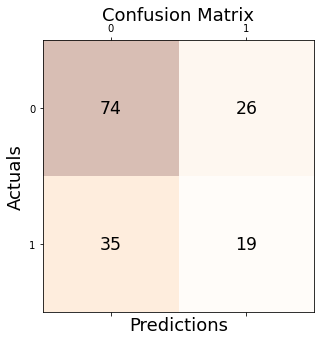

In [ ]:
plot_confusion_matrix(y_test, pred)

**d. Also evaluate it using Python's Scikit-learn package.**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'], axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

result = accuracy_score(y_test, pred)
result

0.7922077922077922

In [ ]:
get_scores(y_test, pred)

Precision Score: 0.6744186046511628
Recall Score: 0.6170212765957447
F1 Score: 0.6444444444444444
Accuracy Score: 0.7922077922077922
Specificity: 0.8691588785046729


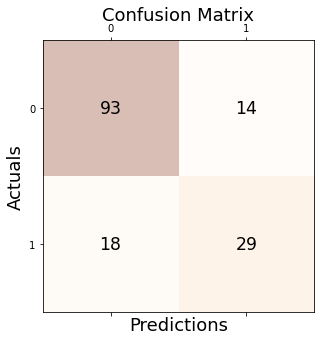

In [ ]:
plot_confusion_matrix(y_test, pred)